# ***Practice notebook for univariate analysis using NHANES data***

$ \ $

* This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES (National Health and Nutrition Examination Survey).  These analyses are similar to what was done in the week 2 NHANES case study notebook.

$ \ $

* You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

$ \ $

* Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

$ \ $

* To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np


In [2]:
data = pd.read_csv("nhanes_2015_2016.csv")
data


,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


-----

# ***Question 1***

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.


..........................

Vuelva a etiquetar la variable de estado civil DMDMARTL para tener etiquetas de caracteres breves pero informativas. Luego construya una tabla de frecuencia de estos valores para todas las personas, luego solo para mujeres y solo para hombres. Luego construya estas tres tablas de frecuencia usando solo personas cuya edad esté entre 30 y 40 años.

[documento con detalles](https://github.com/tamalmuk21/Stat_with_python/blob/master/stat/utf-8''nhanes_univariate_practice.ipynb)

In [3]:
data.columns  

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [4]:
data["DMDMARTL"] 

0       1.0
1       3.0
2       1.0
3       6.0
4       3.0
       ... 
5730    2.0
5731    1.0
5732    2.0
5733    1.0
5734    5.0
Name: DMDMARTL, Length: 5735, dtype: float64

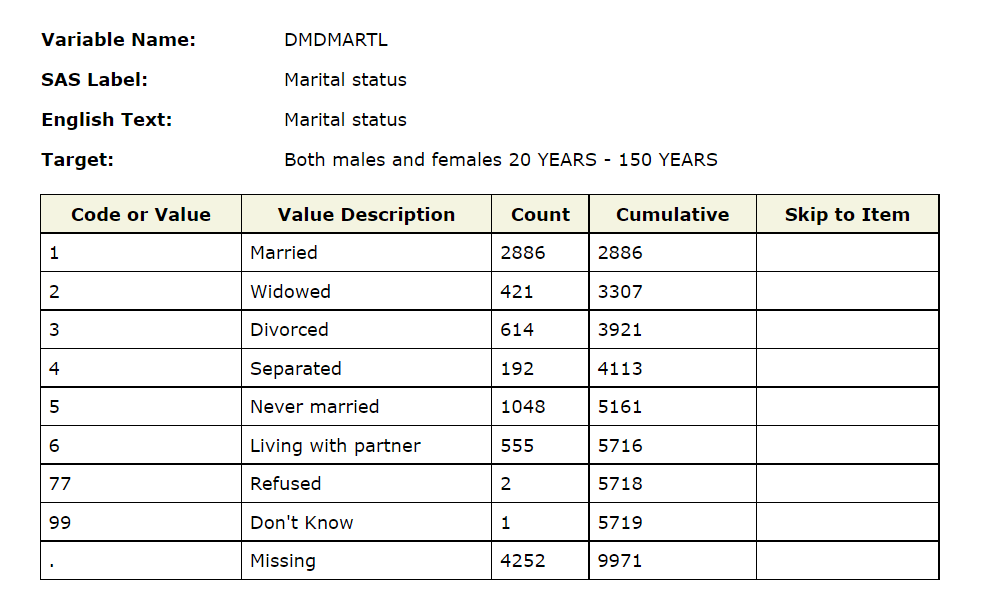

In [5]:
# tener en cuenta que la imagen de arriba está actualizada y nuestros datos en excel no lo están.
data["DMDMARTL"].value_counts()  


1.0     2780
5.0     1004
3.0      579
6.0      527
2.0      396
4.0      186
77.0       2
Name: DMDMARTL, dtype: int64

$ \ $

* El método `fillna()` reemplaza los valores `NULL` con un valor especificado.

$ \ $

* El método `fillna()` devuelve un nuevo objeto DataFrame a menos que el parámetro inplace se establezca en True; en ese caso, el método fillna() realiza el reemplazo en el DataFrame original.

In [6]:
# creamos una nueva columna llamada "DMDMARTLx", la cual hace el siguiente intercambio {1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married", 6: "Living with partner", 77: "Refused", 9: "Don't know"}
data["DMDMARTLx"] = data["DMDMARTL"].replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married", 6: "Living with partner", 77: "Refused", 9: "Don't know"}).fillna("Missing")
data["DMDMARTLx"] 


0                   Married
1                  Divorced
2                   Married
3       Living with partner
4                  Divorced
               ...         
5730                Widowed
5731                Married
5732                Widowed
5733                Married
5734          Never married
Name: DMDMARTLx, Length: 5735, dtype: object

In [7]:
data["DMDMARTLx"].value_counts()  

Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Missing                 261
Separated               186
Refused                   2
Name: DMDMARTLx, dtype: int64

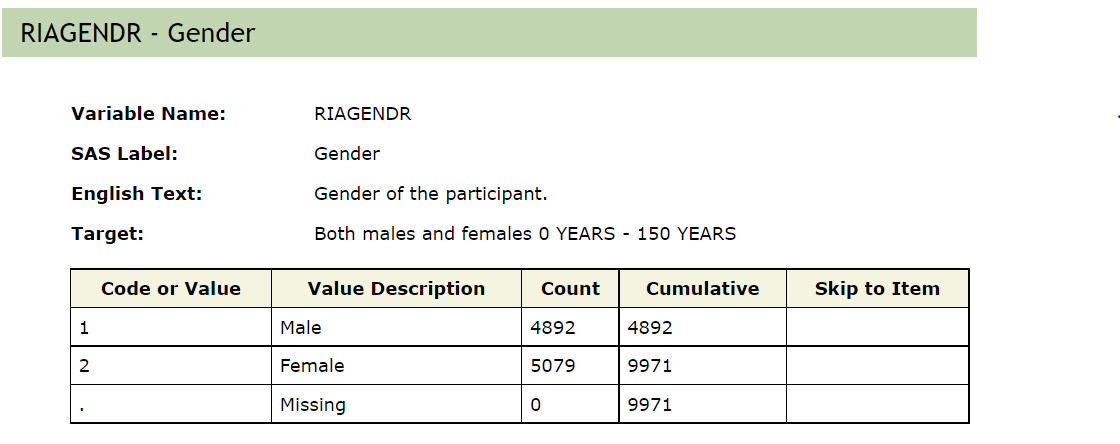

In [8]:
data["RIAGENDR"] 

0       1
1       1
2       1
3       2
4       2
       ..
5730    2
5731    1
5732    2
5733    1
5734    2
Name: RIAGENDR, Length: 5735, dtype: int64

In [9]:
# creamos una nueva columna llamada "RIAGENDRx", la cual hace el siguiente intercambio {1: "Male", 2: "Female"}
data["RIAGENDRx"] = data["RIAGENDR"].replace({1: "Male", 2: "Female"})
data["RIAGENDRx"]

0         Male
1         Male
2         Male
3       Female
4       Female
         ...  
5730    Female
5731      Male
5732    Female
5733      Male
5734    Female
Name: RIAGENDRx, Length: 5735, dtype: object

In [10]:
data["RIAGENDRx"].value_counts()  

Female    2976
Male      2759
Name: RIAGENDRx, dtype: int64

In [11]:
# Tabla de frecuencia hombres.
mascara_hombres = data["RIAGENDRx"]=="Male"
Male = data[mascara_hombres]["DMDMARTLx"]
Male.value_counts() 

Married                1477
Never married           484
Living with partner     265
Divorced                229
Missing                 135
Widowed                 100
Separated                68
Refused                   1
Name: DMDMARTLx, dtype: int64

In [12]:
# Tabla de frecuencia mujeres. 
mascara_mujeres = data["RIAGENDRx"]=="Female"
Female = data[mascara_mujeres]["DMDMARTLx"]
Female.value_counts() 

Married                1303
Never married           520
Divorced                350
Widowed                 296
Living with partner     262
Missing                 126
Separated               118
Refused                   1
Name: DMDMARTLx, dtype: int64

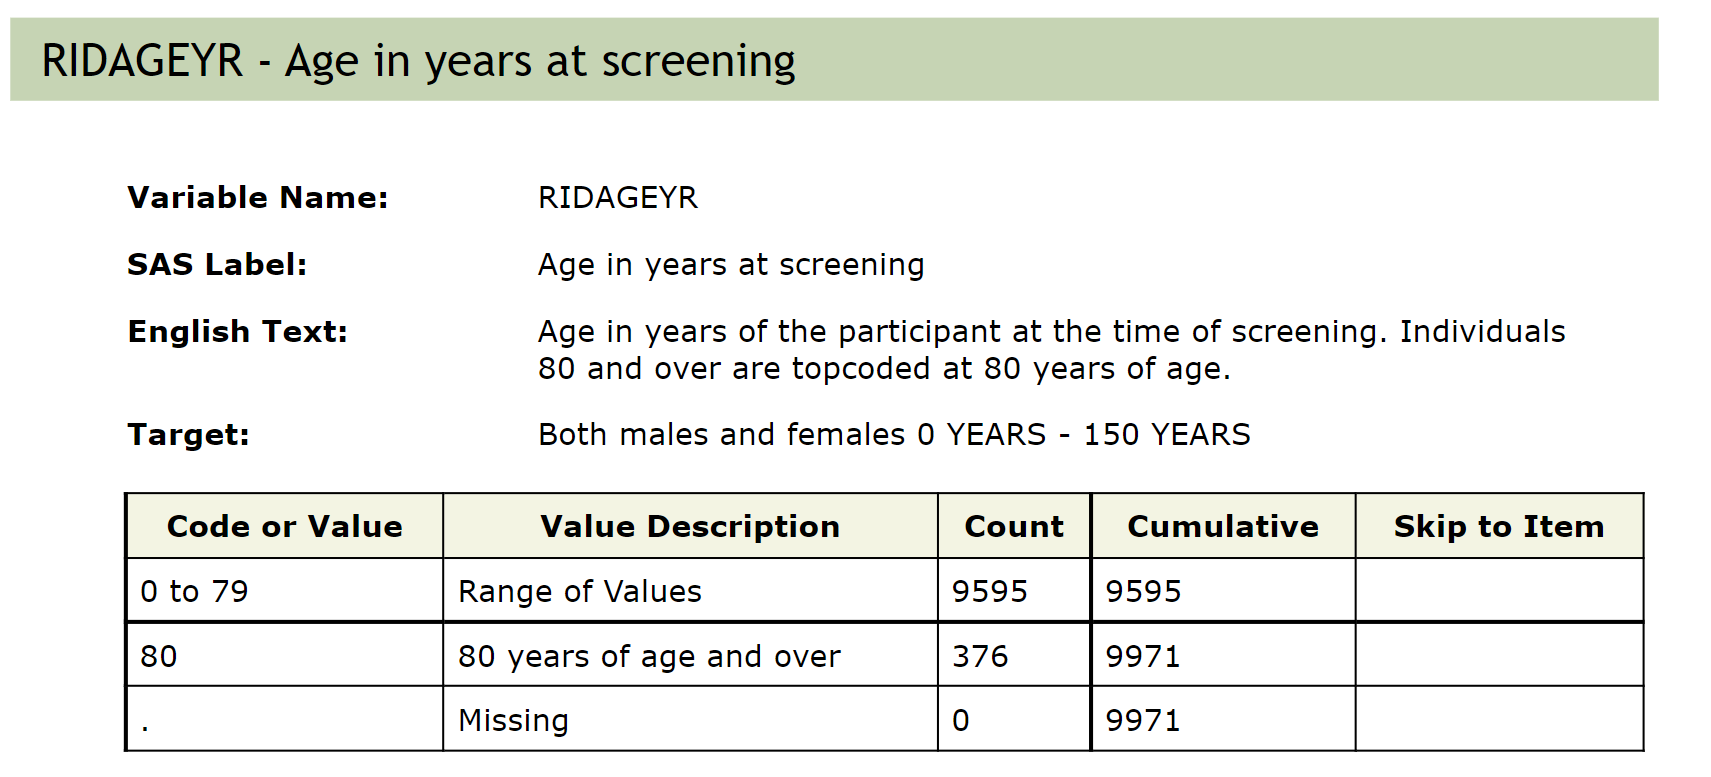

In [26]:
data["RIDAGEYR"]

0       62
1       53
2       78
3       56
4       42
        ..
5730    76
5731    26
5732    80
5733    35
5734    24
Name: RIDAGEYR, Length: 5735, dtype: int64

In [27]:
data["Los treintas"] = pd.cut(data["RIDAGEYR"], [30, 40])
data["Los treintas"]

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
5730             NaN
5731             NaN
5732             NaN
5733    (30.0, 40.0]
5734             NaN
Name: Los treintas, Length: 5735, dtype: category
Categories (1, interval[int64, right]): [(30, 40]]

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

__Q1c.__ Repeat part b for the men.


$ \ $

$ \ $

----

# ***Question 2***

* Restricting to the female population.

* Stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band. 


* Within each age band, present the distribution in terms of proportions that must sum to 1.

In [16]:
Female_2 = data[data["RIAGENDR"]==2].reset_index() 
Female_2 

,index,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,...,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,DMDMARTLx,RIAGENDRx
0,3,83735,2.0,1.0,1.0,2,2,56,3,1.0,...,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,Living with partner,Female
1,4,83736,2.0,1.0,1.0,2,2,42,4,1.0,...,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Divorced,Female
2,5,83737,2.0,2.0,NaN,2,2,72,1,2.0,...,64.4,150.0,28.6,34.4,33.5,31.4,92.9,NaN,Separated,Female
3,7,83742,1.0,NaN,1.0,2,2,32,1,2.0,...,64.5,151.3,28.2,34.1,33.1,31.5,93.3,2.0,Married,Female
4,12,83752,1.0,NaN,2.0,1,2,30,2,1.0,...,71.2,163.6,26.6,37.3,35.7,31.0,90.7,2.0,Living with partner,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,5724,93682,NaN,NaN,NaN,2,2,41,5,1.0,...,58.2,166.9,20.9,37.1,35.3,26.9,80.8,2.0,Married,Female
2972,5727,93689,2.0,1.0,NaN,2,2,69,1,1.0,...,64.8,151.9,28.1,32.2,32.6,28.7,101.1,2.0,Married,Female
2973,5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,...,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0,Widowed,Female
2974,5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,...,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0,Widowed,Female


In [17]:
# datos relacionados con el estado marital (marital status)
data_mujeres = data[data["RIAGENDR"]==2]["DMDMARTL"].reset_index().drop(columns=["index"])
data_mujeres 

,DMDMARTL
0,6.0
1,3.0
2,4.0
3,1.0
4,6.0
...,...
2971,1.0
2972,1.0
2973,2.0
2974,2.0


In [18]:
# Este es el resultado pedido, pero el archivo csv no tiene la info completa.
# data_mujeres_pedida=data_mujeres[data["DMDYRSUS"]<=3]

`__Q2a.__` Comment on the trends (tendencia) 5 / 5,000  that you see in this series of marginal distributions.

`__Q2b.__` Repeat the construction for males.

In [19]:
Male_2 = data[data["RIAGENDR"]==1].reset_index() 
Male_2 

,index,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,...,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,DMDMARTLx,RIAGENDRx
0,0,83732,1.0,NaN,1.0,1,1,62,3,1.0,...,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,Married,Male
1,1,83733,1.0,NaN,6.0,1,1,53,3,2.0,...,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Divorced,Male
2,2,83734,1.0,NaN,NaN,1,1,78,3,1.0,...,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,Married,Male
3,6,83741,1.0,NaN,8.0,1,1,22,4,1.0,...,76.6,165.4,28.0,38.8,38.0,34.0,86.6,NaN,Never married,Male
4,8,83743,NaN,NaN,NaN,2,1,18,5,1.0,...,72.4,166.1,26.2,NaN,NaN,NaN,NaN,2.0,Missing,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2754,5726,93685,1.0,NaN,2.0,1,1,53,1,2.0,...,78.7,156.9,32.0,31.5,38.0,33.7,107.5,2.0,Married,Male
2755,5728,93690,1.0,NaN,3.0,2,1,32,2,1.0,...,89.5,164.9,32.9,40.0,38.0,39.0,101.0,2.0,Married,Male
2756,5729,93691,2.0,2.0,NaN,2,1,25,5,2.0,...,39.2,136.5,21.0,33.6,29.7,23.8,75.4,2.0,Never married,Male
2757,5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,...,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0,Married,Male


In [20]:
data_hombres = data[data["RIAGENDR"]==1]["DMDMARTL"].reset_index().drop(columns=["index"])
data_hombres 

,DMDMARTL
0,1.0
1,3.0
2,1.0
3,5.0
4,NaN
...,...
2754,1.0
2755,1.0
2756,5.0
2757,1.0


In [21]:
# Este es el resultado pedido, pero el archivo csv no tiene la info completa.
# data_hombres_pedida=data_hombres[data["DMDYRSUS"]<=3]

__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

$ \ $

-----

# ***Question 3***

$ \ $

Construct a histogram of the distribution of heights using the `BMXHT` variable in the `NHANES` sample.

In [22]:
data["BMXHT"]

0       184.5
1       171.4
2       170.1
3       160.9
4       164.9
        ...  
5730    165.8
5731    182.2
5732    152.2
5733    173.3
5734    165.0
Name: BMXHT, Length: 5735, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Histogram of the distribution of heights')]

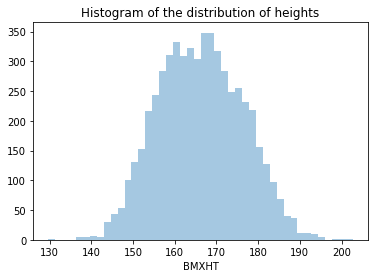

In [23]:
sns.distplot(data["BMXHT"], kde = False).set(title="Histogram of the distribution of heights")

$ \ $

------

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

$ \ $

$ \ $ 

-----

__Q3b.__ Make separate histograms for the `heights` of women and men, then make a side-by-side boxplot showing the heights of women and men.

$ \ $ 

In [ ]:
data["RIAGENDR"]

$ \ $ 

-----

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

$ \ $ 

$ \ $

-----

# ***Question 4***

$ \ $ 


Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

In [ ]:
# insert your code here

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [ ]:
# insert your code here

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

In [ ]:
# insert your code here

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

$ \ $

----


# ***Question 5***

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [ ]:
# insert your code here

__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [ ]:
# insert your code here

$ \ $

-----

# ***Question 6***

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [ ]:
# insert your code here

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [ ]:
# insert your code here

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.